In [1]:
import MDAnalysis as mda
import time
import os
import numpy
from multiprocessing import Pool
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import vesicle_analysis_methods as vam
%matplotlib inline
print("MDA version: " + mda.__version__)

MDA version: 0.11.0


# Spuddafett Performance

In [4]:
hostname = "spuddafett"
fig_dir = "/nfs/homes/ikenney/Projects/vesicles/scripts/analysis/figs/"
data_dir = "/nfs/homes/ikenney/Projects/vesicles/scripts/analysis/data/"
systems_dir = "/nfs/homes/ikenney/Projects/vesicles/scripts/analysis/systems/"

values = [y.split('/')[-1] for y in glob.glob("systems/*")]

def fig_save(inputs):
    paths = [fig_dir+inputs.replace(" ","_").lower()+".png",fig_dir+inputs.replace(" ","_").lower()+".pdf"]
    for p in paths:
        plt.savefig(p)
        
if os.path.exists(data_dir+"performance_combined.df"):
    systems = pd.read_pickle(data_dir+"performance_combined.df")
    print("Pickle loaded")
else:
    systems = pd.DataFrame(index=values+['1_5M','3M'])
    location = '/nfs/homes/ikenney/Projects/vesicles/vesicle_library/lib/{}/'.format('rad_gpu')
    pd.DataFrame()
    tops = list((location+'%s/nvt/nvt.tpr') % v for v in values)
    traj = list((location+'%s/nvt/analysis.xtc') % v for v in values)
    gros = list((location+'%s/emin/emin.gro') % v for v in values)
    pdbs = list((location+'%s/emin/emin.pdb') % v for v in values)
    systems['tops'] = list((location+'%s/nvt/nvt.tpr') % v for v in systems.index.tolist())
    systems['traj'] = list((location+'%s/nvt/nvt.xtc') % v for v in systems.index.tolist())
    systems['gros'] = list((location+'%s/emin/emin.gro') % v for v in systems.index.tolist())
    systems['pdbs'] = list((location+'%s/emin/emin.pdb') % v for v in systems.index.tolist())
    systems['sizes'] = list(mda.Universe((location+'%s/emin/emin.tpr') % v).atoms.n_atoms for v in systems.index.tolist())
    print("Pickle not loaded. Creating new dataframe")
    systems.to_pickle("performance_combined.df")

Pickle loaded


In [3]:
testing = vam.integrity(systems,N=40)

'super' not found. Build? (y/n)
Build:	n
'cannon' not found. Build? (y/n)
Build:	y
Added to build list.

Building system in: /nfs/homes/ikenney/Projects/vesicles/scripts/analysis/systems/cannon


/usr/local/lib/python2.7/dist-packages/MDAnalysis/coordinates/xdrfile/core.py:611: UserWarning: Aborted loading offsets from file; ctime or size did not match.
  warnings.warn("Aborted loading offsets from file; ctime or size did not match.")


In [ ]:
testing = pd.read_pickle("backup.df")

In [ ]:
testing = vam.integrity(testing)

In [5]:
testing

,tops,traj,gros,pdbs,sizes,load_tpr_xtc,load_tpr_xtc_mean,load_tpr_xtc_std,rgyr,rgyr_mean,...,load_gro_std,load_pdb,load_pdb_mean,load_pdb_std,load_gro_xtc,load_gro_xtc_mean,load_gro_xtc_std,load_pdb_xtc,load_pdb_xtc_mean,load_pdb_xtc_std
10,/nfs/homes/ikenney/Projects/vesicles/vesicle_l...,/nfs/homes/ikenney/Projects/vesicles/vesicle_l...,/nfs/homes/ikenney/Projects/vesicles/vesicle_l...,/nfs/homes/ikenney/Projects/vesicles/vesicle_l...,84192,"[0.906961917877, 0.646175146103, 0.64720201492...",0.6504799,0.05487724,"[0.0645649433136, 0.0139439105988, 0.015058040...",0.01581439,...,0.03494941,"[1.63636183739, 1.36882209778, 1.36998081207, ...",1.417405,0.04605079,"[0.812260866165, 0.736067056656, 0.83000493049...",0.7845374,0.05229957,"[0.900163173676, 0.734004020691, 0.83897209167...",0.7923271,0.05299975
12.5,/nfs/homes/ikenney/Projects/vesicles/vesicle_l...,/nfs/homes/ikenney/Projects/vesicles/vesicle_l...,/nfs/homes/ikenney/Projects/vesicles/vesicle_l...,/nfs/homes/ikenney/Projects/vesicles/vesicle_l...,122208,"[1.08009600639, 0.910843849182, 0.953723907471...",0.9396519,0.0463124,"[0.0495760440826, 0.0203349590302, 0.020339012...",0.01977546,...,0.04848028,"[2.31244301796, 2.01326584816, 2.043364048, 2....",2.079531,0.06089958,"[1.39565300941, 1.07016086578, 1.13729310036, ...",1.12375,0.05358611,"[1.17889809608, 1.21457886696, 1.0854279995, 1...",1.147644,0.05051503
15,/nfs/homes/ikenney/Projects/vesicles/vesicle_l...,/nfs/homes/ikenney/Projects/vesicles/vesicle_l...,/nfs/homes/ikenney/Projects/vesicles/vesicle_l...,/nfs/homes/ikenney/Projects/vesicles/vesicle_l...,167352,"[1.77836918831, 1.39890003204, 1.64059185982, ...",1.340833,0.09947243,"[0.0664868354797, 0.0272431373596, 0.027190923...",0.02594769,...,0.06202191,"[3.00930285454, 2.68005919456, 2.74405407906, ...",2.773912,0.08646917,"[1.79708600044, 1.64452815056, 1.55634212494, ...",1.619298,0.07295249,"[1.66879916191, 2.09777593613, 1.71681499481, ...",1.612537,0.1006321
17.5,/nfs/homes/ikenney/Projects/vesicles/vesicle_l...,/nfs/homes/ikenney/Projects/vesicles/vesicle_l...,/nfs/homes/ikenney/Projects/vesicles/vesicle_l...,/nfs/homes/ikenney/Projects/vesicles/vesicle_l...,219000,"[2.1928319931, 1.78767418861, 1.77426505089, 1...",1.749344,0.09450337,"[0.0840508937836, 0.0348660945892, 0.034923076...",0.03757927,...,0.06326917,"[3.99988007545, 3.63028478622, 3.62102484703, ...",3.625912,0.102245,"[2.24931502342, 2.13562107086, 2.11486291885, ...",2.128716,0.04828503,"[2.34408187866, 2.55591106415, 2.05329394341, ...",2.145152,0.1113648
20,/nfs/homes/ikenney/Projects/vesicles/vesicle_l...,/nfs/homes/ikenney/Projects/vesicles/vesicle_l...,/nfs/homes/ikenney/Projects/vesicles/vesicle_l...,/nfs/homes/ikenney/Projects/vesicles/vesicle_l...,277728,"[2.70102405548, 2.5904519558, 2.33227586746, 2...",2.213901,0.1317523,"[0.152985811234, 0.0632860660553, 0.0613470077...",0.04632508,...,0.1099175,"[4.67630195618, 4.63462018967, 4.60874700546, ...",4.560246,0.09073322,"[2.61696100235, 3.19830989838, 2.75921392441, ...",2.649675,0.1192898,"[2.62881994247, 2.64006900787, 2.69602799416, ...",2.686906,0.07284565
22.5,/nfs/homes/ikenney/Projects/vesicles/vesicle_l...,/nfs/homes/ikenney/Projects/vesicles/vesicle_l...,/nfs/homes/ikenney/Projects/vesicles/vesicle_l...,/nfs/homes/ikenney/Projects/vesicles/vesicle_l...,343500,"[3.76799297333, 2.82876706123, 2.6613471508, 2...",2.746464,0.1914239,"[0.134228944778, 0.0775680541992, 0.0524899959...",0.05333273,...,0.1314149,"[5.77255916595, 5.47572803497, 5.42670607567, ...",5.538886,0.154933,"[3.3411090374, 3.6380739212, 3.38899993896, 3....",3.438037,0.2916678,"[3.84388685226, 3.62601113319, 3.33982300758, ...",3.377616,0.1170741
25,/nfs/homes/ikenney/Projects/vesicles/vesicle_l...,/nfs/homes/ikenney/Projects/vesicles/vesicle_l...,/nfs/homes/ikenney/Projects/vesicles/vesicle_l...,/nfs/homes/ikenney/Projects/vesicles/vesicle_l...,416208,"[4.16732501984, 3.36751103401, 3.55466198921, ...",3.343667,0.1743339,"[0.157492160797, 0.0635039806

## Radius of Gyration

In [ ]:
def performance(a):
    u = mda.Universe(a[0],a[1])
    vals = []
    for frame in u.trajectory:
        start = time.time()
        u.atoms.radiusOfGyration()
        vals.append(time.time()-start)
    return vals

Record times to perform radius of gyration calculations on each data set

In [ ]:
p = Pool(len(values))
processlist = list([systems['tops'][x],systems['traj'][x],systems['sizes'][x]] for x in range(len(systems)))
data = p.map(performance,processlist)
systems['rgyr'] = data
p.close()
timedata = np.array([[np.mean(x),np.std(x)] for x in data])
systems['rgyr_mean'] = list(np.mean(r) for r in systems['rgyr'])
systems['rgyr_std'] = list(np.std(r) for r in systems['rgyr'])
systems.to_pickle("performance_combined.df")

In [ ]:
#plt.figure(figsize=(8,4))
plt.title("Radius of Gyration Performance on {}".format(hostname))
plt.xlabel("System Size (atoms)")
plt.ylabel("Calculation time (s)")
plt.errorbar(systems['sizes'],systems['rgyr_mean'],yerr=systems['rgyr_std'])
#plt.savefig("/nfs/homes/ikenney/report/figs/geometric/calc_time_vs_system.png")
#plt.savefig("/nfs/homes/ikenney/report/figs/geometric/calc_time_vs_system.pdf")

## Load Times

Record times for loading universes with different schemes

### TPR and XTC

In [ ]:
N = 40
def performanceload(a):
    res = a[3]
    def load():
        start = time.time()
        u = mda.Universe(a[0],a[1])
        return time.time() - start
    return [load() for _ in range(res)]

In [ ]:
N = 40
p = Pool(len(values))
processlist = list([systems['tops'][x],systems['traj'][x],systems['sizes'],N] for x in range(len(systems.index.tolist())))
dataload = p.map(performanceload,processlist)
systems['load_tpr_xtc'] = dataload
p.close()
systems['load_tpr_xtc_mean'] = list(np.mean(r) for r in systems['load_tpr_xtc'])
systems['load_tpr_xtc_std'] = list(np.std(r) for r in systems['load_tpr_xtc'])
systems.to_pickle("performance_combined.df")

In [ ]:
systems.to_pickle("performance_combined.df")

In [ ]:
systems['load_tpr_xtc_median'] = list(np.median(r) for r in systems['load_tpr_xtc'])

In [ ]:
N = 40
inputs = "TPR and XTC"
#plt.figure(figsize=(8,4))
plt.title("Load Time Performance on {0} loading {1} ({2} runs)".format(hostname,inputs,N))
plt.xlabel("System Size (atoms)")
plt.ylabel("Load time (s)")
A = plt.errorbar(systems['sizes'],systems['load_tpr_xtc_mean'],yerr=systems['load_tpr_xtc_std'])
fig_save(inputs)

### GRO only

In [ ]:
N = 40
def performanceload(a):
    res = a[2]
    def load():
        start = time.time()
        u = mda.Universe(a[0])
        return time.time() - start
    return [load() for _ in range(res)]

In [ ]:
p = Pool(len(values))
processlist = list([systems['gros'][x],systems['sizes'][x],N] for x in range(len(systems)))
dataload = p.map(performanceload,processlist) 
systems['load_gro'] = dataload
p.close()
systems['load_gro_mean'] = list(np.mean(r) for r in systems['load_gro'])
systems['load_gro_std'] = list(np.std(r) for r in systems['load_gro'])
systems.to_pickle("performance_combined.df")

In [ ]:
inputs = "GRO"
#plt.figure(figsize=(8,4))
plt.title("Load Time Performance on {0} loading {1} ({2} runs)".format(hostname,inputs,N))
plt.xlabel("System Size (atoms)")
plt.ylabel("Load time (s)")
B = plt.errorbar(systems['sizes'],systems['load_gro_mean'],yerr=systems['load_gro_std'])
#plt.savefig("/nfs/homes/ikenney/report/figs/loading/"+inputs.replace(" ","_").lower())
#plt.savefig("/nfs/homes/ikenney/report/figs/loading/"+inputs.replace(" ","_").lower()+".pdf")

## PDB only

In [ ]:
N = 40
def performanceload(a):
    res = a[2]
    def load():
        start = time.time()
        u = mda.Universe(a[0])
        return time.time() - start
    return [load() for _ in range(res)]

In [ ]:
p = Pool(len(values))
processlist = list([systems['pdbs'][x],systems['sizes'][x],N] for x in range(len(systems)))
dataload = p.map(performanceload,processlist)   
systems["load_pdb"] = dataload
p.close()
systems['load_pdb_mean'] = list(np.mean(r) for r in systems['load_pdb'])
systems['load_pdb_std'] = list(np.std(r) for r in systems['load_pdb'])
systems.to_pickle("performance_combined.df")

In [ ]:
inputs = "PDB"
#plt.figure(figsize=(8,4))
plt.title("Load Time Performance on {0} loading {1} ({2} runs)".format(hostname,inputs,N))
plt.xlabel("System Size (atoms)")
plt.ylabel("Load time (s)")
C = plt.errorbar(systems['sizes'],systems['load_pdb_mean'],yerr=systems['load_pdb_std'])
#plt.savefig("/nfs/homes/ikenney/report/figs/loading/"+inputs.replace(" ","_").lower())
#plt.savefig("/nfs/homes/ikenney/report/figs/loading/"+inputs.replace(" ","_").lower()+".pdf")

## GRO and XTC

In [ ]:
def performanceload(a):
    res = a[3]
    def load():
        start = time.time()
        u = mda.Universe(a[0],a[1])
        return time.time() - start
    return [load() for _ in range(res)]

In [ ]:
N = 40
p = Pool(len(values))
processlist = list([systems['gros'][x],systems['traj'][x],systems['sizes'][x],N] for x in range(len(systems)))
dataload = p.map(performanceload,processlist)    
systems['load_gro_xtc'] = dataload
p.close()
systems['load_gro_xtc_mean'] = list(np.mean(r) for r in systems['load_gro_xtc'])
systems['load_gro_xtc_std'] = list(np.std(r) for r in systems['load_gro_xtc'])
systems.to_pickle("performance_combined.df")

In [ ]:
inputs = "GRO and XTC"
#plt.figure(figsize=(8,4))
plt.title("Load Time Performance on {0} loading {1} ({2} runs)".format(hostname,inputs,N))
plt.xlabel("System Size (atoms)")
plt.ylabel("Load time (s)")
D = plt.errorbar(systems['sizes'],systems['load_gro_xtc_mean'],yerr=systems['load_gro_xtc_std'])
#plt.savefig("/nfs/homes/ikenney/report/figs/loading/"+inputs.replace(" ","_").lower())
#plt.savefig("/nfs/homes/ikenney/report/figs/loading/"+inputs.replace(" ","_").lower()+".pdf")

### PDB and XTC

In [ ]:
def performanceload(a):
    res = a[3]
    def load():
        start = time.time()
        u = mda.Universe(a[0],a[1])
        return time.time() - start
    return [load() for _ in range(res)]

In [ ]:
N = 40
p = Pool(len(values))
processlist = list([systems['gros'][x],systems['traj'][x],systems['sizes'][x],N] for x in range(len(systems)))
dataload = p.map(performanceload,processlist)    
systems['load_pdb_xtc'] = dataload
p.close()
systems['load_pdb_xtc_mean'] = list(np.mean(r) for r in systems['load_pdb_xtc'])
systems['load_pdb_xtc_std'] = list(np.std(r) for r in systems['load_pdb_xtc'])
systems.to_pickle("performance_combined.df")

In [ ]:
inputs = "PDB and XTC"
#plt.figure(figsize=(8,4))
plt.title("Load Time Performance on {0} loading {1} ({2} runs)".format(hostname,inputs,N))
plt.xlabel("System Size (atoms)")
plt.ylabel("Load time (s)")
E = plt.errorbar(systems['sizes'],systems['load_pdb_xtc_mean'],yerr=systems['load_pdb_xtc_std'])
#plt.savefig("/nfs/homes/ikenney/report/figs/loading/"+inputs.replace(" ","_").lower())
#plt.savefig("/nfs/homes/ikenney/report/figs/loading/"+inputs.replace(" ","_").lower()+".pdf")

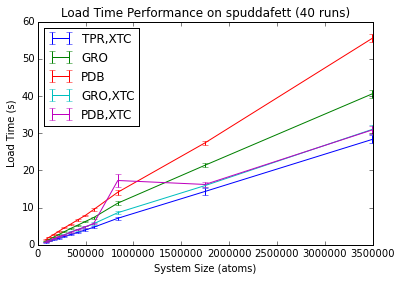

In [7]:
plt.title("Load Time Performance on spuddafett (40 runs)")
plt.ylabel("Load Time (s)")
plt.xlabel("System Size (atoms)")
plots = [plt.errorbar(systems['sizes'],systems['load_tpr_xtc_mean'],yerr=systems['load_tpr_xtc_std']),plt.errorbar(systems['sizes'],systems['load_gro_mean'],yerr=systems['load_gro_std']),plt.errorbar(systems['sizes'],systems['load_pdb_mean'],yerr=systems['load_pdb_std']),plt.errorbar(systems['sizes'],systems['load_gro_xtc_mean'],yerr=systems['load_gro_xtc_std']),plt.errorbar(systems['sizes'],systems['load_pdb_xtc_mean'],yerr=systems['load_pdb_xtc_std'])]
plt.legend(plots,["TPR,XTC","GRO","PDB","GRO,XTC","PDB,XTC"],loc='best')
#plt.savefig("/nfs/homes/ikenney/report/figs/loading/combined_load")
#plt.savefig("/nfs/homes/ikenney/report/figs/loading/combined_load.pdf")

In [6]:
systems = testing